# Revtsov HW3

In [15]:
library(quantmod)
library(PerformanceAnalytics)
library(car)
library(fBasics)

## Problem 1

### Part a

$$
    \mathcal{L}[\theta; x] = \prod_{i=1}^n f_x(x_i;\theta)=\prod_{i=1}^n(\frac{1}{\theta}) = (\frac{1}{\theta})^n 
$$

### Part b

$$
    log(\mathcal{L}[\theta; x]) = log(\frac{1}{\theta^n}) 
$$
$$
    \mathcal{l}[\theta; x] = log(\frac{1}{\theta^n}) 
$$
$$
    \hat{\theta}=argmin[-log(\frac{1}{\theta^n})]
$$
$$
    \frac{d}{d\theta}(-\mathcal{l}[\theta; x]) =\frac{d}{d\theta}(-log(\frac{1}{\theta^n})) = \frac{d}{d\theta}(log({\theta^n}))
$$
$$
    \frac{d}{d\theta}(log({\theta^n})) = \frac{1}{\theta^n}(n\theta^{n-1})=\frac{n}{\theta}
$$
$$
    0=\frac{n}{\theta}
$$
So, to minimize the above fraction theta must approach infinity; since we are working with a bounded space the maximum will occur at the boundary.
$$
    \hat{\theta}=max[X_1,...,X_n]
$$

### Part c

$$
    \mathbb{E}[max\{X_n\}] = \frac{n}{n+1}\quad for\quad X \sim U(0,1)
$$
$$
    \mathbb{E}[max\{X_n\}] = \frac{\theta n}{n+1}\quad for\quad X \sim  U(0,\theta)
$$

$$
    bias[\hat{\theta}] = \mathbb{E}[\hat{\theta}] - \theta = \frac{\theta n}{n+1} - \theta = -\frac{\theta}{n+1}
$$

$$
    Var[max\{X_n\}] = \frac{n}{(n+1)^2(n+2)}\quad for\quad X \sim U(0,1)
$$

$$
    Var[max\{X_n\}] = \frac{\theta^2 n}{(n+1)^2(n+2)}\quad for\quad X \sim U(0,\theta)
$$

$$
    se[\hat{\theta}] = \sqrt{Var[\hat{\theta}]} = \frac{\theta \sqrt{n}}{(n+1)\sqrt{n+2}}
$$

$$
    mse[\hat{\theta}] = bias[\hat{\theta}]^2 + se[\hat{\theta}]^2
$$
$$
    mse[\hat{\theta}] = \frac{\theta^2}{(n+1)^2} + \frac{\theta^2 n}{(n+1)^2(n+2)} = \frac{\theta^2(n+2)+\theta^2 n}{(n+1)^2(n+2)} = \frac{2\theta^2(n+1)}{(n+1)^2(n+2)} = \frac{2\theta^2}{(n+1)(n+2)}
$$

## Problem 2

In [2]:
exp_distr <- function(lam, n, trials) {
    lam_hat <- numeric(trials)
    for (i in 1:trials) {
        x <- rexp(n, rate=lam)
        lam_hat[i] <- n / sum(x)
    }
    print(sprintf("mu: %s", mean(lam_hat)))
    print(sprintf("sigma: %s", sd(lam_hat)))
    options(repr.plot.width = 12, repr.plot.height = 8)
    title = sprintf("Lambda Hat (lam=%s, samples=%s, trials=%s)", lam, n, trials)
    density_plot = hist(lam_hat, main=title, probability=TRUE, breaks=131)
    quantile_plot = qqPlot(lam_hat, distribution='norm', envelope=TRUE, id=FALSE, main=title)
}

### Part a

[1] "mu: 0.555214974040497"
[1] "sigma: 0.19632740497757"


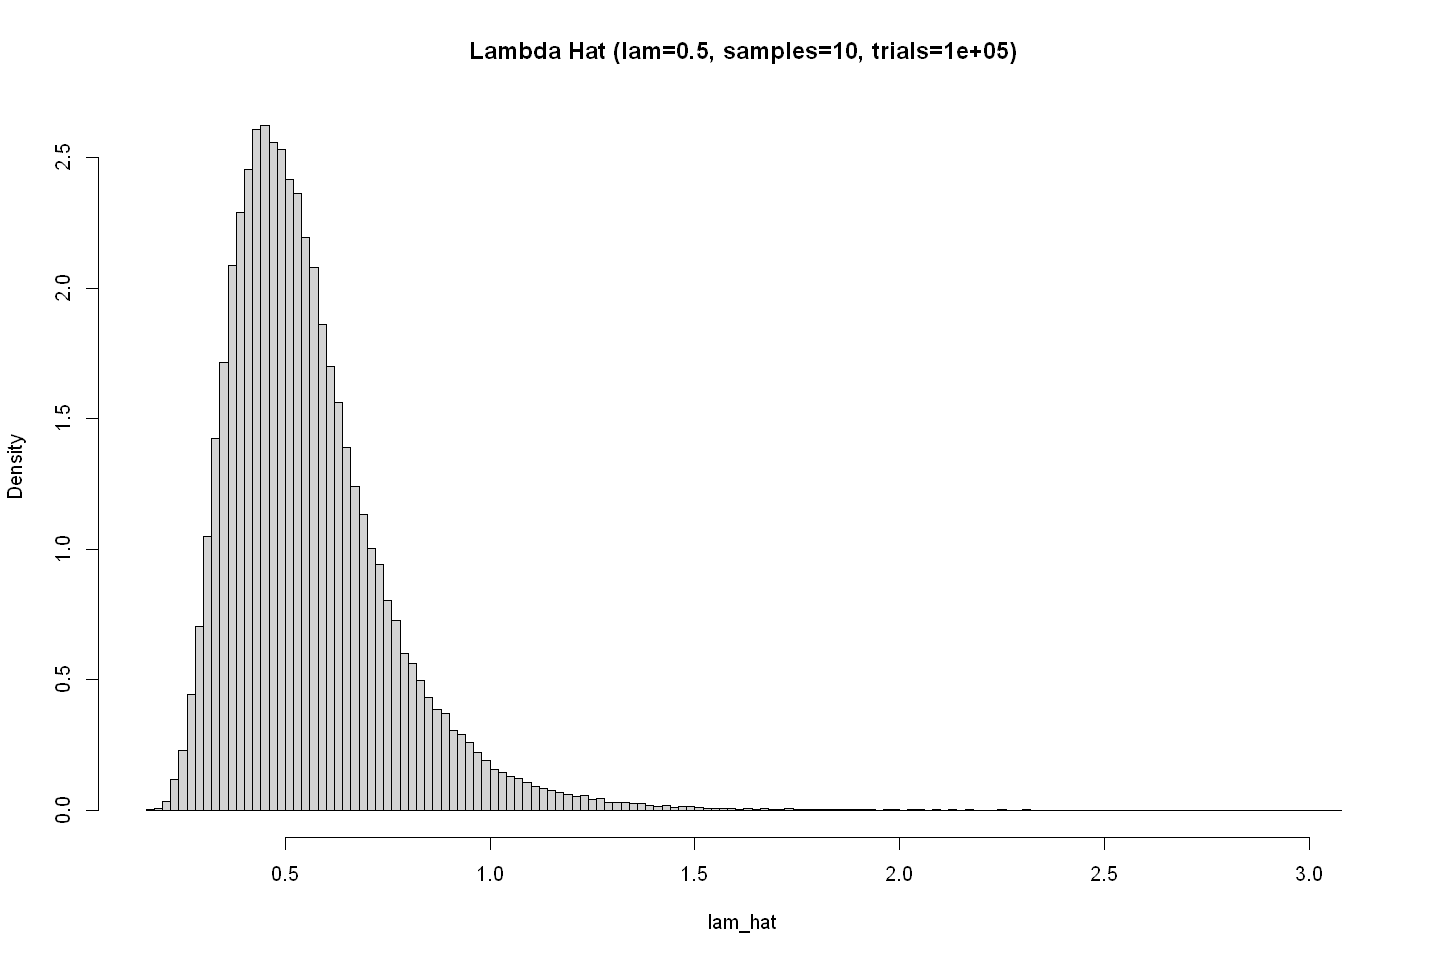

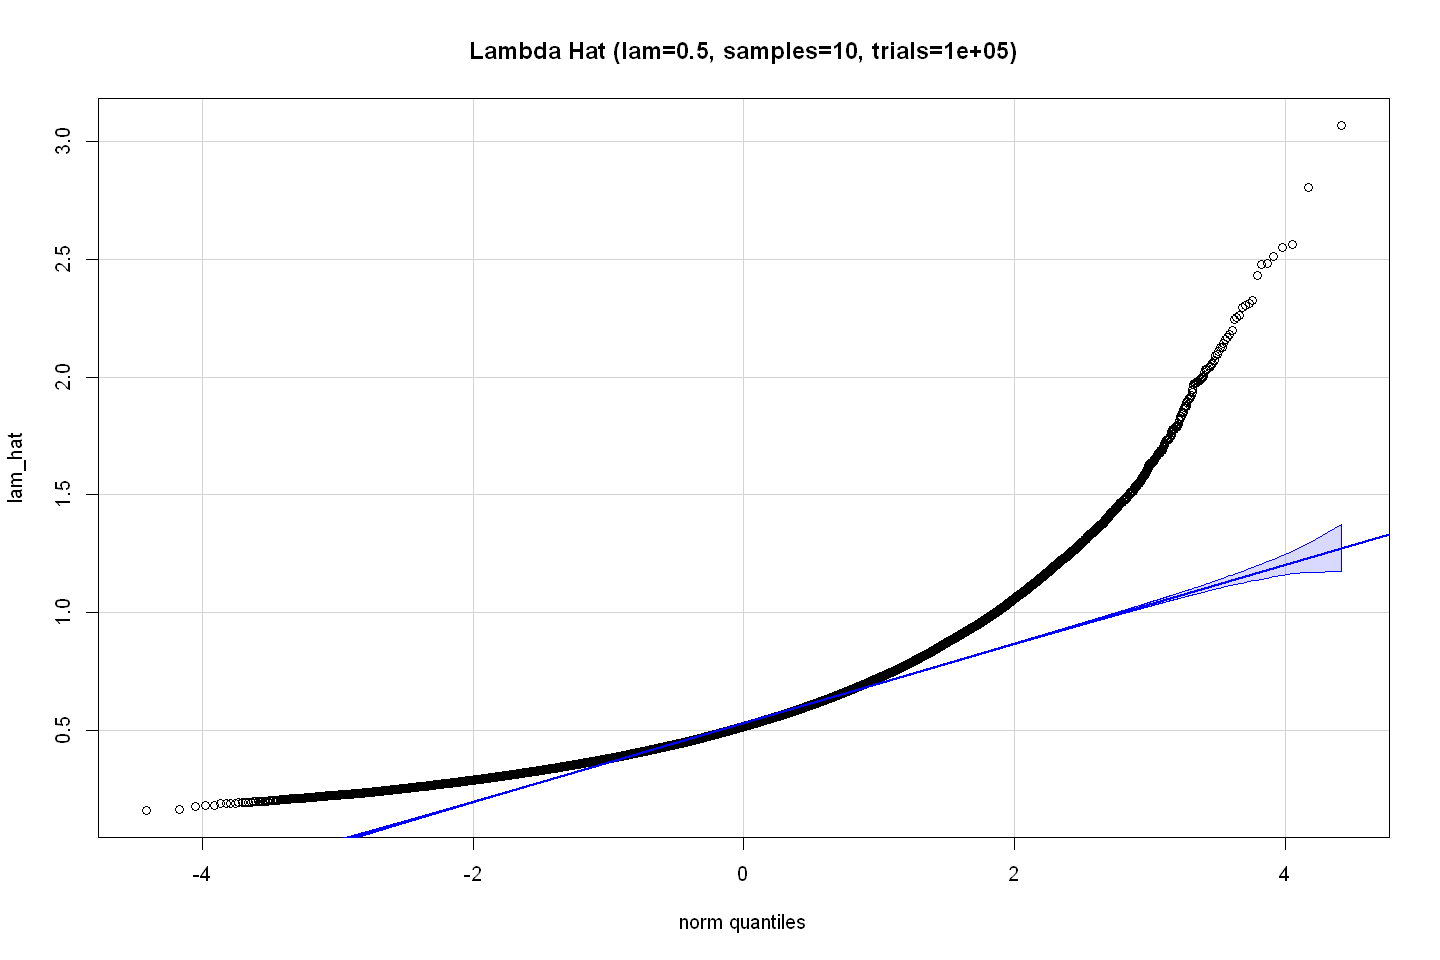

In [3]:
exp_distr(0.5, 10, 100000)

### Part b

[1] "mu: 0.50055363082297"
[1] "sigma: 0.0158033749998763"


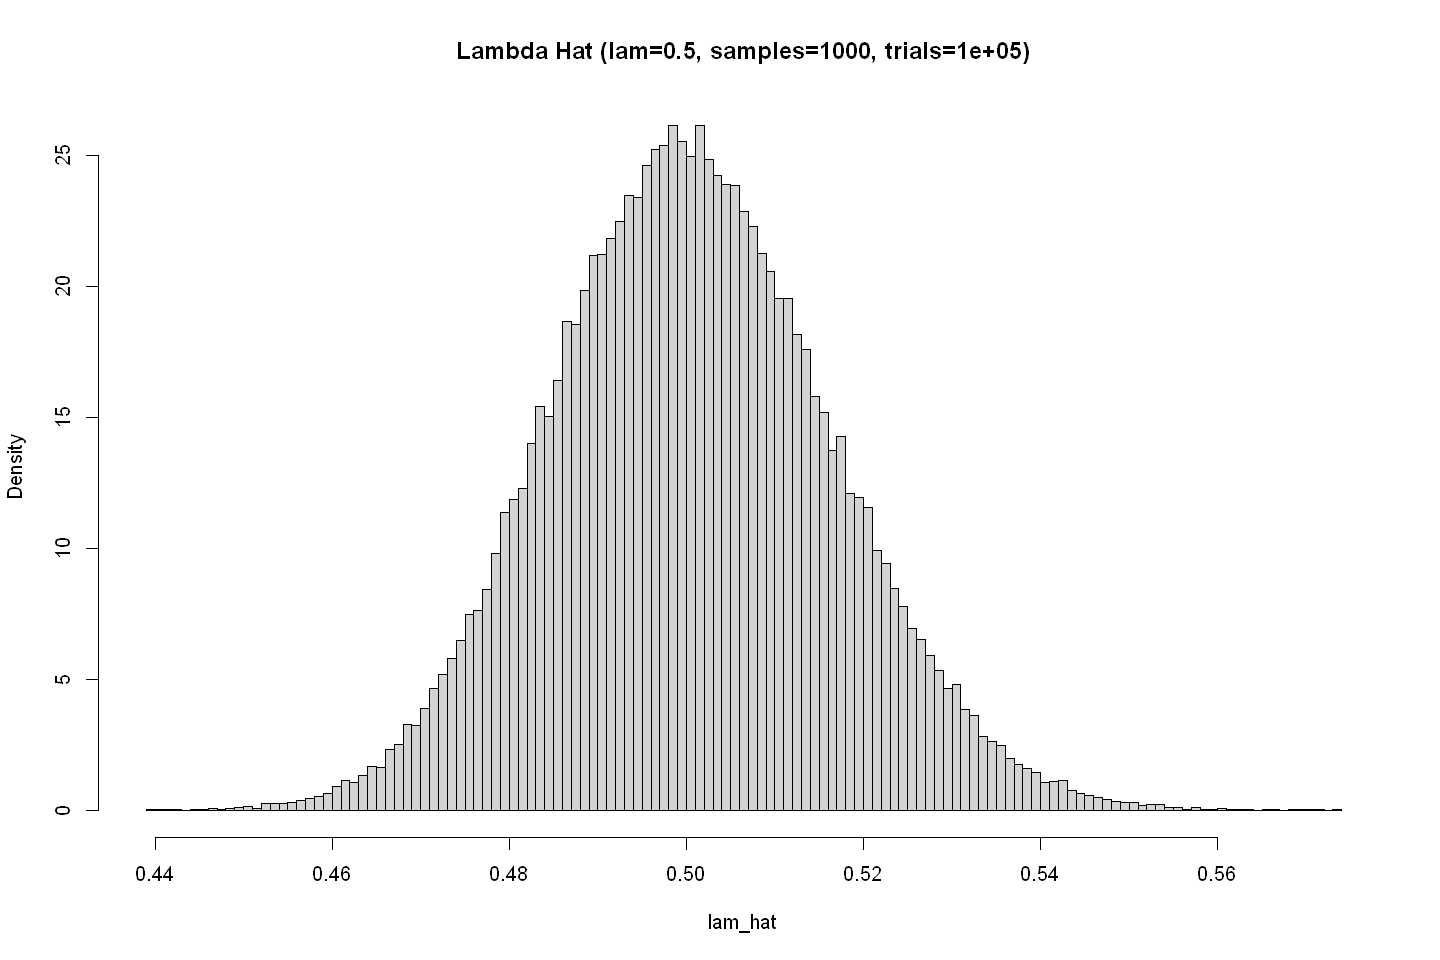

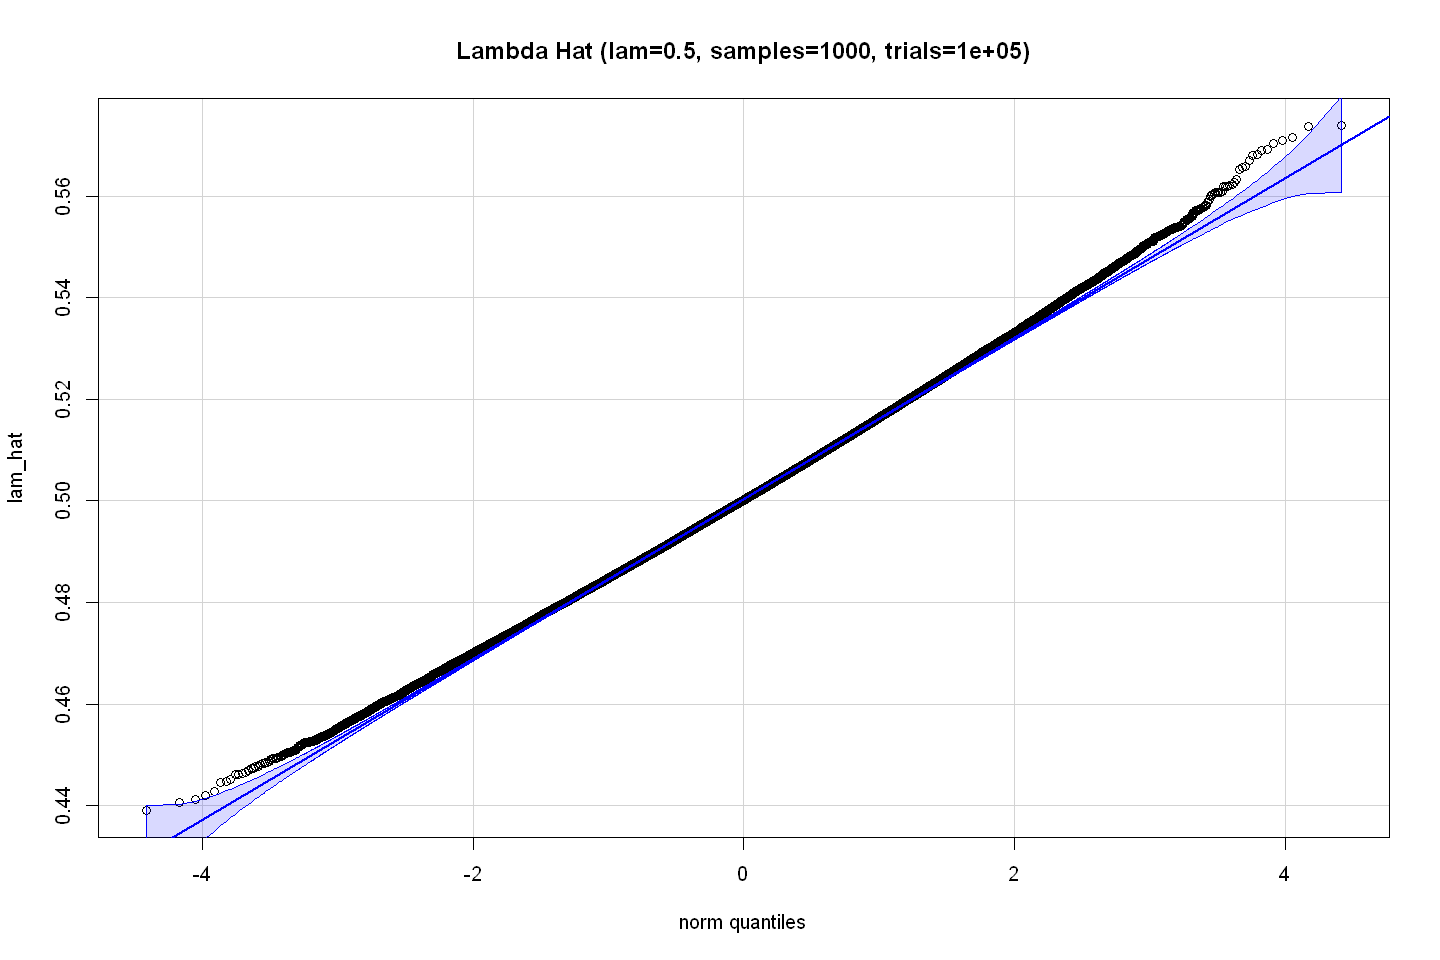

In [4]:
exp_distr(0.5, 1000, 100000)

### Part c

[1] "mu: 0.500049425802716"
[1] "sigma: 0.0049764098097842"


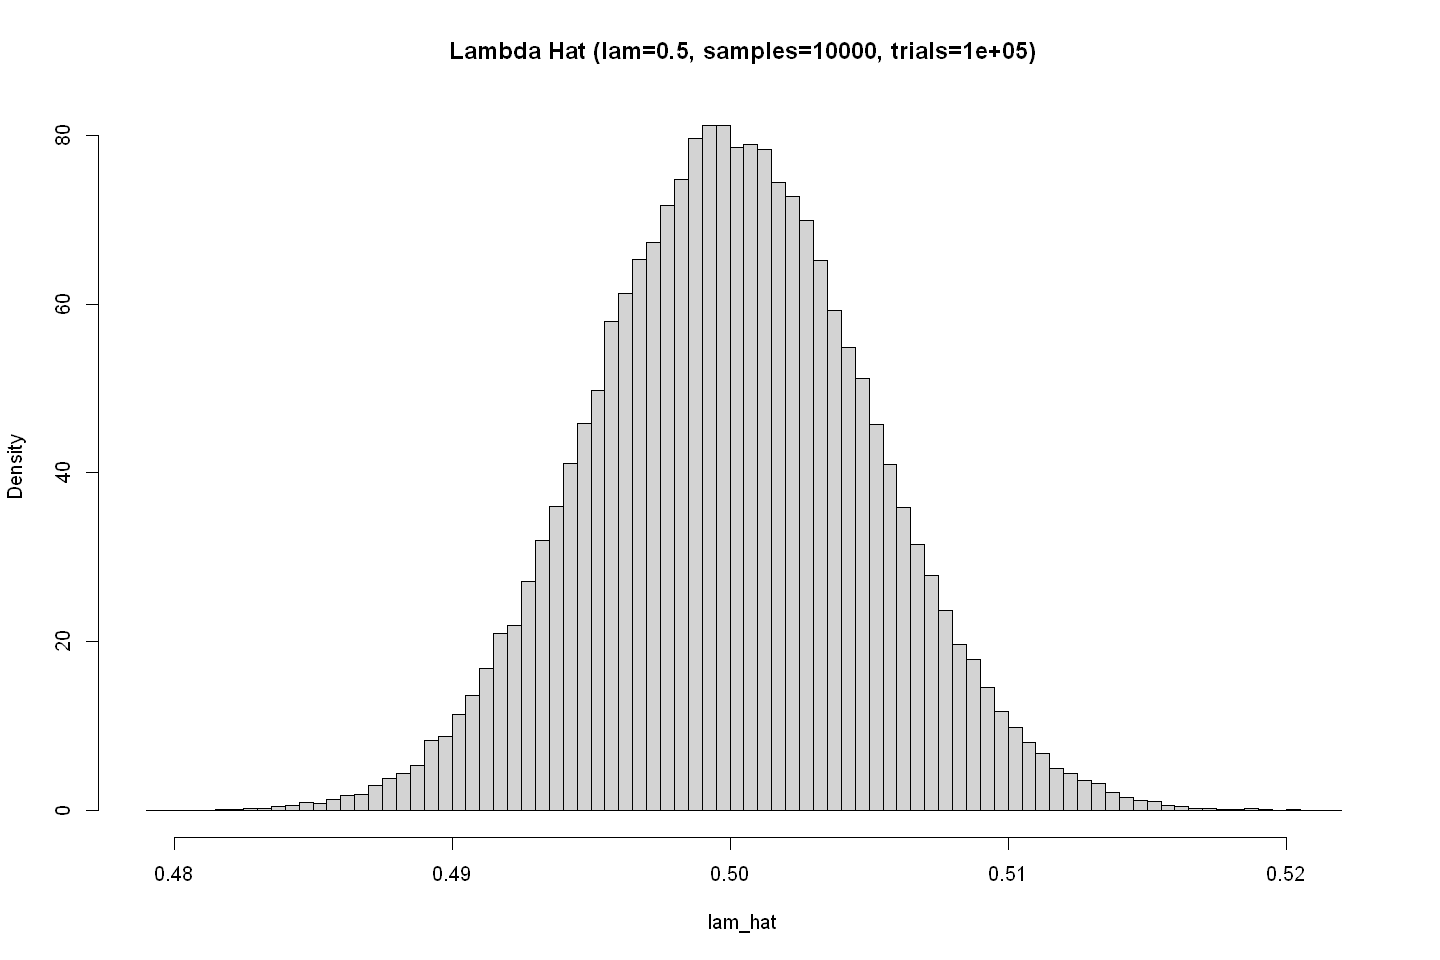

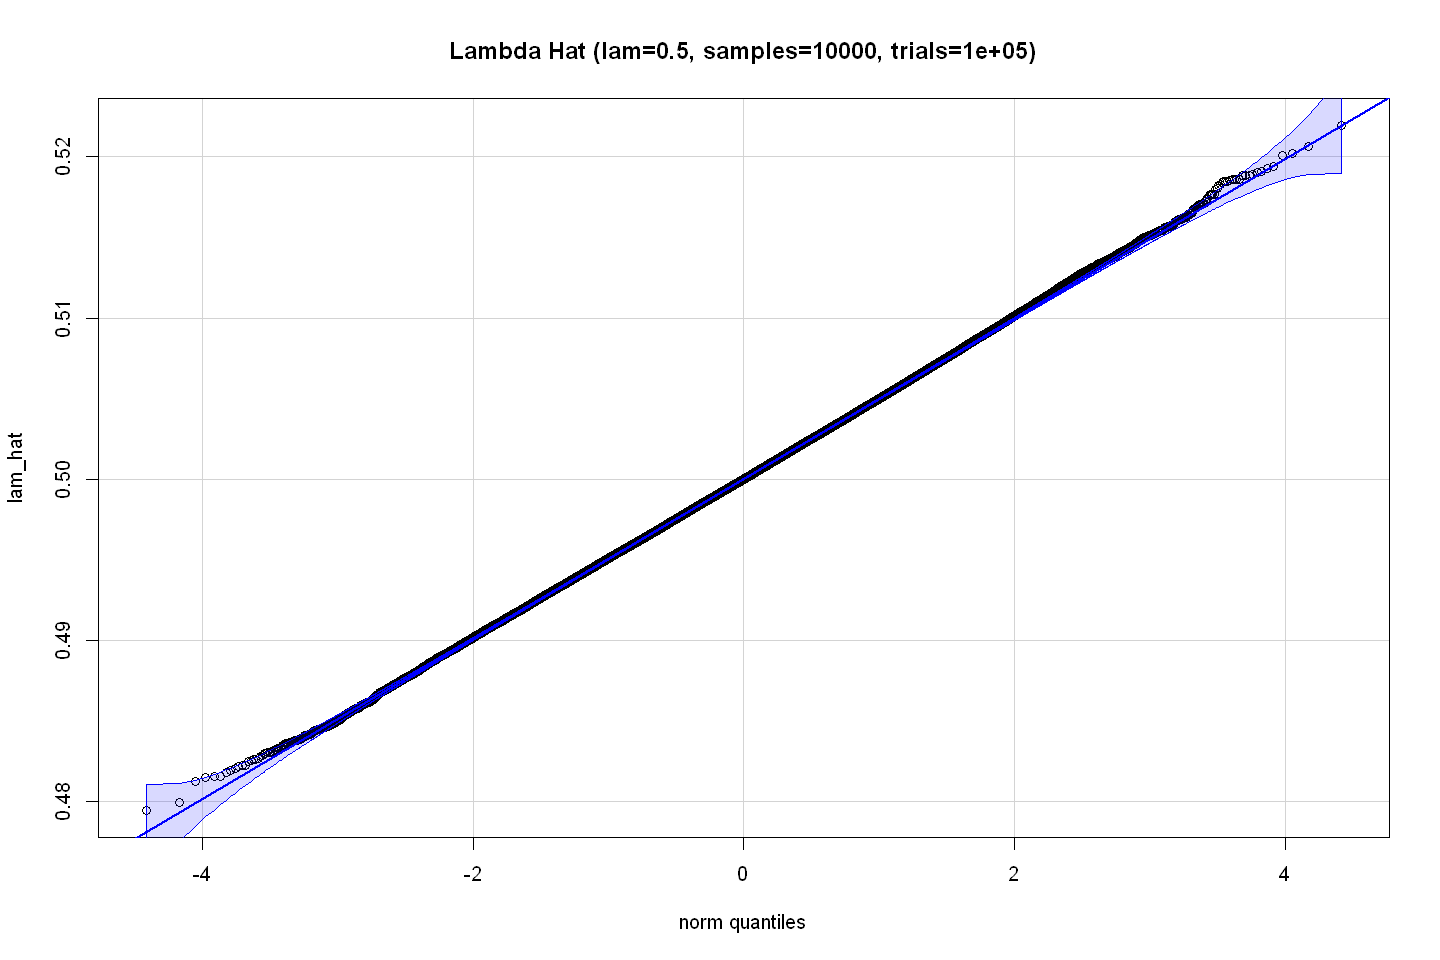

In [5]:
exp_distr(0.5, 10000, 100000)

### Part d
* Expected value of the estimates gets awfully close to 0.5, which the the pre-defined lambda value. Therefore the estimator is unbiased.
* The estimator does appear to be consistent as the bias and standard error both shrink as N increases, leading mse to shrink as well.
* The estimator appears to be asymptotically normal since the QQ plot looks quite linear.

## Problem 3

In [6]:
aapl <- getSymbols("AAPL", from="2020-01-01", to="2024-01-01", auto.assign=FALSE)$AAPL.Adjusted
aapl.returns <- coredata(na.omit(Return.calculate(aapl, method="log")))

### Part a

In [7]:
sample.mean <- mean(aapl.returns)
sample.sd <- sd(aapl.returns)
n = length(aapl.returns)

alpha <- 0.05
# since we're assuming that the returns are normally distributed, distribution of the estimator
# will be a t-distribution with n-1 degrees of freedom.
# using the appropraite quantile function to calculate quantile
talpha <- qt(1 - alpha / 2, df=n-1)

In [8]:
(ci.lowerbound <- sample.mean - talpha * sample.sd / sqrt(n))

[1] -0.0003454637

In [9]:
(ci.upperbound <- sample.mean + talpha * sample.sd / sqrt(n))

[1] 0.002271242

In [10]:
basicStats(aapl.returns)

,AAPL.Adjusted
,<dbl>
nobs,1005.000000
NAs,0.000000
Minimum,-0.137708
Maximum,0.113158
1. Quartile,-0.009169
3. Quartile,0.012662
Mean,0.000963
Median,0.000988
Sum,0.967704


basicStats returns the same confidence interval (LCL mean and UCL mean) as my calculations.

### Part b

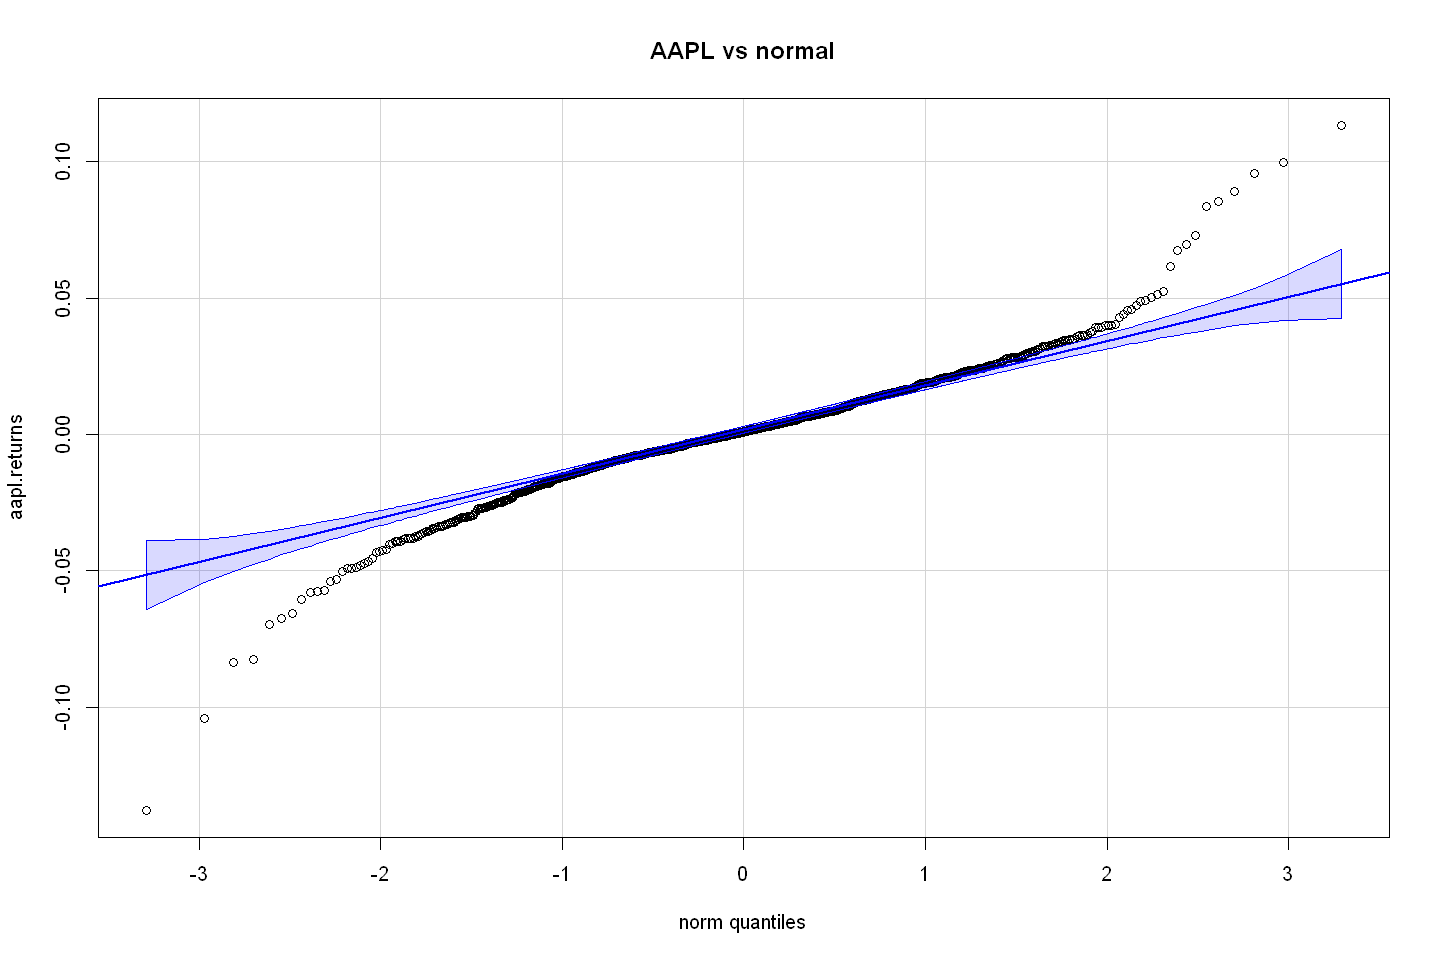

In [11]:
qqPlot(aapl.returns, distribution='norm', envelope=TRUE, id=FALSE, main='AAPL vs normal')

Since the actual return distribution has heavier tails than a normal distribution, the probability of returns ending up in the tails is higher. Therefore, I would expect the confidence interval for such a distribution to be wider than of a normal distribution. This issue is important in risk management of an investment portfolio; when calculating potential losses you will under estimate the likelihood of a large loss.

### Part c
* Null hypothesis is that mean daily log returns are zero
* Since we don't know the variance we should use t-test

$$H_0: \mu = 0$$
$$H_1: \mu \neq 0$$

In [12]:
# create a function so we don't need to write the same code twice
# start/end dates of prices and the null hypothesis as input params
t_test <- function(start_date, end_date, mu0) {
    # get data and calculate returns
    prices <- getSymbols("AAPL", from=start_date, to=end_date, auto.assign=FALSE)$AAPL.Adjusted
    returns <- coredata(na.omit(Return.calculate(prices, method="log")))
    # calculate mean, std dev, and number of samples
    mu = mean(returns)
    sig = sd(returns)
    n = length(returns)    
    # calculate test value
    t <- (mu - mu0) / (sig / sqrt(n))
    # calculate p-value
    p <- 2 * pt(-abs(t), df=n-1)
    # print test value and p-value
    print(sprintf("test value: %.4f", t))
    print(sprintf("p-value: %.4f", p))
}

In [13]:
t_test("2020-01-01", "2024-01-01", 0)

[1] "test value: 1.4442"
[1] "p-value: 0.1490"


p-value is larger than the typical alpha of 0.05, so we fail to reject the null hypothesis. i.e. we *can't* reject the statement that mean of daily log returns is zero.

### Part d

In [14]:
t_test("2000-01-01", "2024-01-01", 0)

[1] "test value: 2.7272"
[1] "p-value: 0.0064"


p-value is smaller than the typical alpha of 0.05, so we reject the null hypothesis. i.e. we *can* reject the statement that mean of daily log returns is zero.